<a href="https://colab.research.google.com/github/gaditi123/quant/blob/main/returns_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [ ]:
netflix = web.get_data_yahoo("NFLX",start = "2011-01-01",end = "2020-03-01")

In [ ]:
print(netflix.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2011-01-03  25.838572  24.785713  25.000000  25.487143  39956000.0  25.487143
2011-01-04  26.414286  25.469999  25.907143  25.910000  44065700.0  25.910000
2011-01-05  26.112858  25.530001  25.878571  25.675714  31799600.0  25.675714
2011-01-06  25.670000  25.092857  25.168571  25.427143  31991400.0  25.427143
2011-01-07  25.792856  25.197144  25.524286  25.614286  22155000.0  25.614286


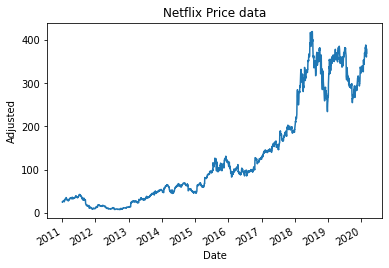

In [ ]:
netflix['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Netflix Price data")
plt.show()

In [ ]:
netflix_daily_returns = netflix['Adj Close'].pct_change()
netflix_monthly_returns = netflix['Adj Close'].resample('M').ffill().pct_change()

In [ ]:
print(netflix_daily_returns.head())

Date
2011-01-03         NaN
2011-01-04    0.016591
2011-01-05   -0.009042
2011-01-06   -0.009681
2011-01-07    0.007360
Name: Adj Close, dtype: float64


In [ ]:
print(netflix_monthly_returns.head())

Date
2011-01-31         NaN
2011-02-28   -0.034613
2011-03-31    0.150530
2011-04-30   -0.021490
2011-05-31    0.163880
Freq: M, Name: Adj Close, dtype: float64


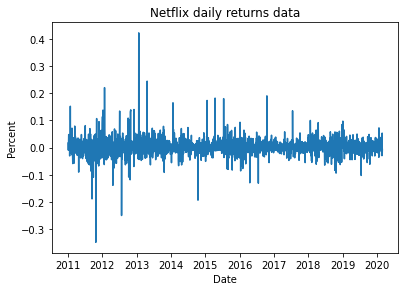

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
plt.show()

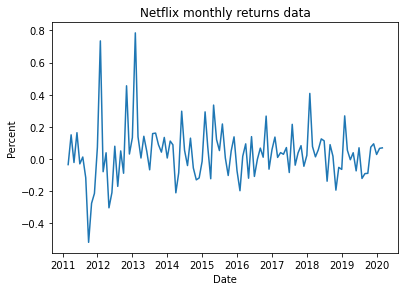

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix monthly returns data")
plt.show()

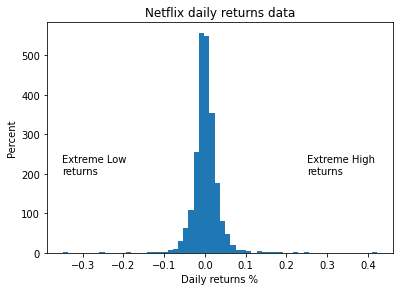

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

In [ ]:
netflix_cum_returns = (netflix_daily_returns + 1).cumprod()

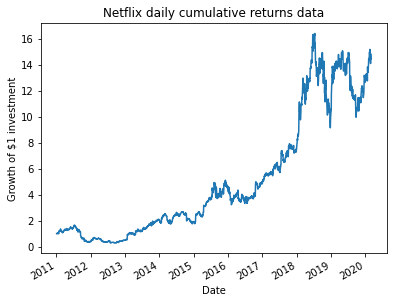

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix daily cumulative returns data")
plt.show()

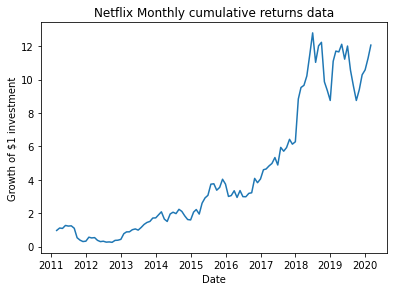

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_cum_returns = (netflix_monthly_returns+1).cumprod()
ax1.plot(netflix_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix Monthly cumulative returns data")
plt.show()

In [ ]:
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
multpl_stocks = web.get_data_yahoo(tickers,start = "2015-01-01",end = "2020-03-01")

In [ ]:
multpl_stocks.head()

Attributes  Adj Close              ...      Volume           
Symbols            FB        AMZN  ...        NFLX       GOOG
Date                               ...                       
2015-01-02  78.449997  308.519989  ...  13475000.0  1447563.0
2015-01-05  77.190002  302.190002  ...  18165000.0  2059840.0
2015-01-06  76.150002  295.290009  ...  16037700.0  2899940.0
2015-01-07  76.150002  298.420013  ...   9849700.0  2065054.0
2015-01-08  78.180000  300.459991  ...   9601900.0  3353582.0

[5 rows x 30 columns]

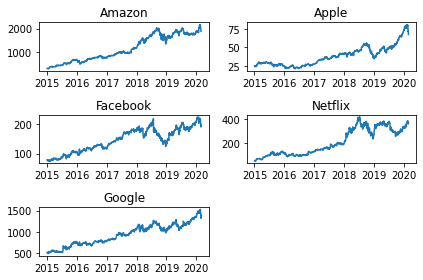

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(multpl_stocks['Adj Close']['AMZN'])
ax1.set_title("Amazon")
ax2.plot(multpl_stocks['Adj Close']['AAPL'])
ax2.set_title("Apple")
ax3.plot(multpl_stocks['Adj Close']['FB'])
ax3.set_title("Facebook")
ax4.plot(multpl_stocks['Adj Close']['NFLX'])
ax4.set_title("Netflix")
ax5.plot(multpl_stocks['Adj Close']['GOOG'])
ax5.set_title("Google")
plt.tight_layout()
plt.show()

In [ ]:
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

<Figure size 432x288 with 0 Axes>

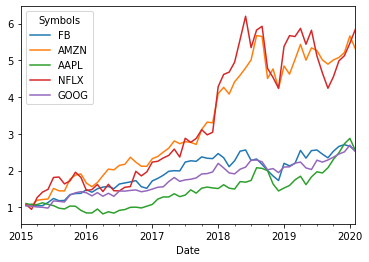

In [ ]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

Moving window

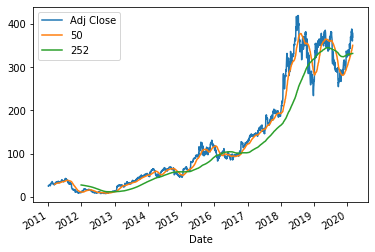

In [ ]:
# Short moving window rolling mean
netflix['50'] = netflix['Adj Close'].rolling(window=50).mean()

# Long moving window rolling mean
netflix['252'] = netflix['Adj Close'].rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
netflix[['Adj Close', '50', '252']].plot()

# Show plot
plt.show()

Volatality of the stocks

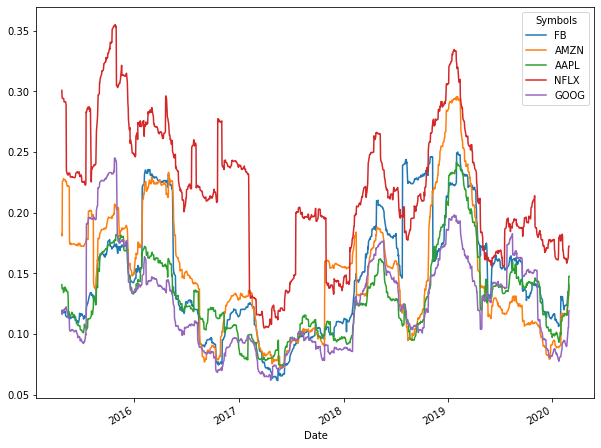

In [ ]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = multpl_stock_daily_returns.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()